In [1]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive. For more details see https://qiskit.org/documentation/partners/qiskit_ibm_runtime/tutorials.html
# result = Sampler("ibmq_qasm_simulator").run(circuits).result()

In [3]:
from qiskit.circuit.library import MCXGate
from qiskit import Aer, execute, transpile

def shift_qc(qc):
    sh1 = MCXGate(1)
    sh2 = MCXGate(2)
    sh3 = MCXGate(3)
    sh4 = MCXGate(4)
    sh5 = MCXGate(5)
    sh6 = MCXGate(6)
    sh7 = MCXGate(7)
    sh8 = MCXGate(8)
    sh9 = MCXGate(9)
    sh10 = MCXGate(10)

    # - operation
    qc.h(10)
    qc.x(10)
    qc.append(sh1, [10,9])
    qc.append(sh2, [10,9,8])
    qc.append(sh3, [10,9,8,7])
    qc.append(sh4, [10,9,8,7,6])
    qc.append(sh5, [10,9,8,7,6,5])
    qc.append(sh6, [10,9,8,7,6,5,4])
    qc.append(sh7, [10,9,8,7,6,5,4,3])
    qc.append(sh8, [10,9,8,7,6,5,4,3,2])
    qc.append(sh9, [10,9,8,7,6,5,4,3,2,1])
    qc.append(sh10, [10,9,8,7,6,5,4,3,2,1,0])
    qc.x(10)

    # + operation
    qc.append(sh1, [10,9])
    qc.x(9)
    qc.append(sh2, [10,9,8])
    qc.x(8)
    qc.append(sh3, [10,9,8,7])
    qc.x(7)
    qc.append(sh4, [10,9,8,7,6])
    qc.x(6)
    qc.append(sh5, [10,9,8,7,6,5])
    qc.x(5)
    qc.append(sh6, [10,9,8,7,6,5,4])
    qc.x(4)
    qc.append(sh7, [10,9,8,7,6,5,4,3])
    qc.x(3)
    qc.append(sh8, [10,9,8,7,6,5,4,3,2])
    qc.x(2)
    qc.append(sh9, [10,9,8,7,6,5,4,3,2,1])
    qc.x(1)
    qc.append(sh10, [10,9,8,7,6,5,4,3,2,1,0])
    qc.x(1)
    qc.x(2)
    qc.x(3)
    qc.x(4)
    qc.x(5)
    qc.x(6)
    qc.x(7)
    qc.x(8)
    qc.x(9)
    return 0

#############################

import numpy as np

def make_qcs(steps):
    qc = QuantumCircuit(11,11)

    #qc.x(10)
    #qc.h(10)
    #qc.p(np.pi/2, 10)

    for i in range(steps):
        shift_qc(qc)

    qc.measure(range(10), range(10))
    return qc
#############################

def run(qc):
    simulator = Aer.get_backend('qasm_simulator')
    job = execute(qc, simulator, shots=5000)
    result = job.result()

    counts = result.get_counts(qc)
    return counts
    #############################

def reverse_binary(bin_string):
    # Reverse the string and return it
    bin_string = bin_string[:-1]
    return bin_string[::-1]

def get_modified(counts):
    # Dictionary comprehension to create a new dictionary with the reversed keys
    reversed_counts = {reverse_binary(k): v for k, v in counts.items()}
    decimal_numbers = {}

    for binary, count in reversed_counts.items():
        decimal = int(binary, 2)
        decimal_numbers[decimal] = count


    # Subtract 1024 from keys larger than 512
    modified_data = {k - 1024 if k > 512 else k: v for k, v in decimal_numbers.items()}
    return modified_data

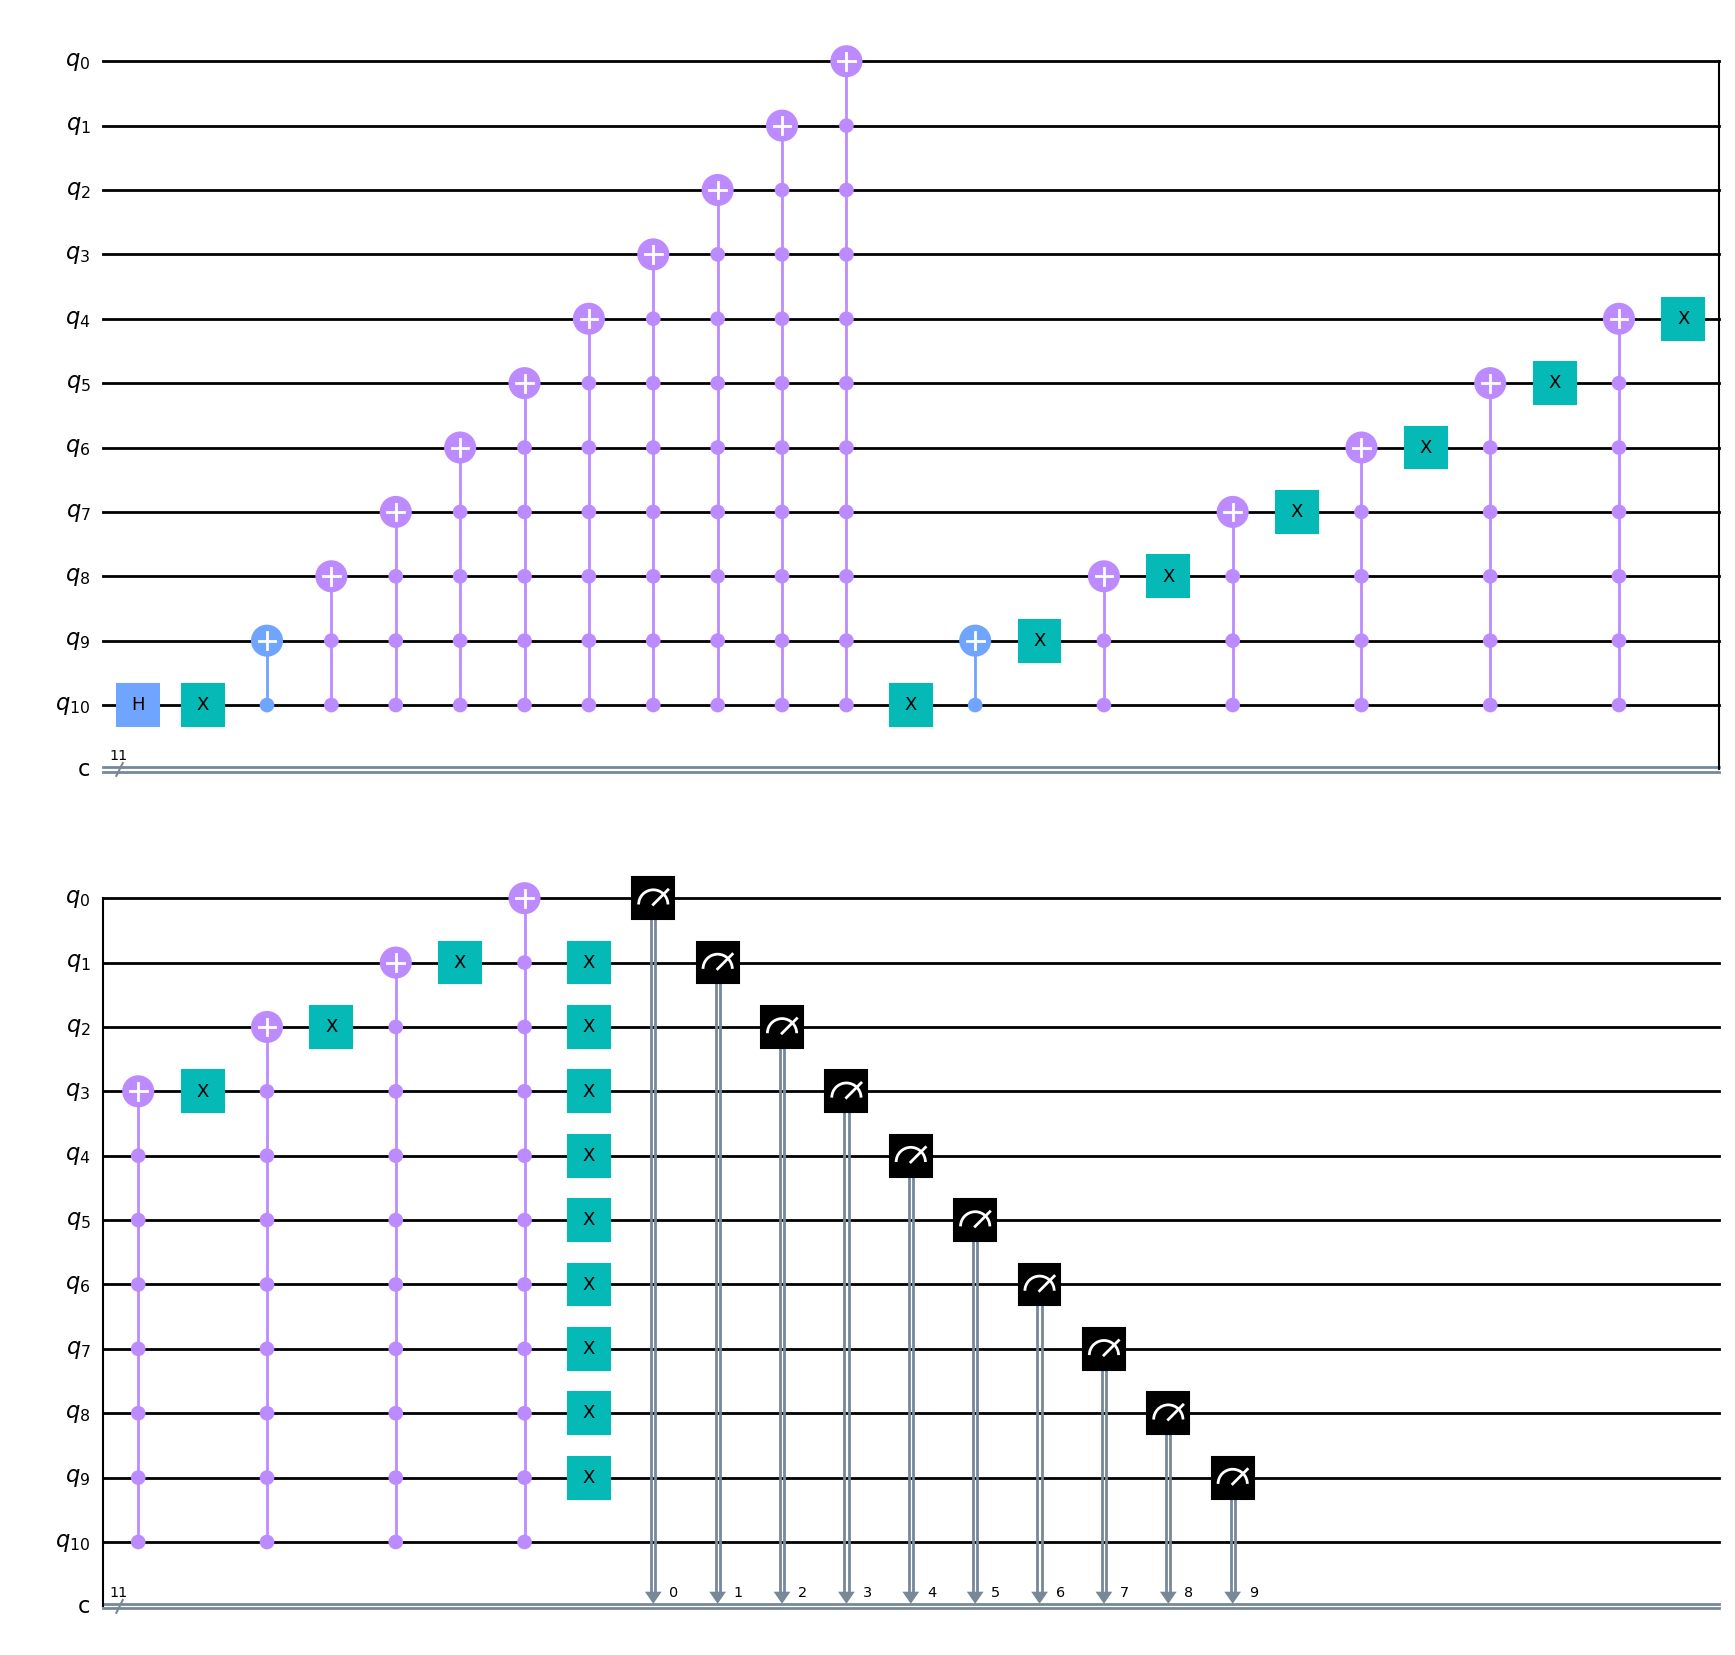

In [48]:
qc_list[0].draw('mpl')

In [47]:
qc_list = []
dict_list = []
for i in range(0,4):
    
    qc = make_qcs(i+1)
    qc_list.append(qc)
    
    counts = run(qc)
    counts = get_modified(counts)
    counts = dict(sorted(counts.items()))
    dict_list.append(counts)

In [2]:
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Options, Session
from qiskit_ibm_provider import IBMProvider, least_busy

# Initialize service and backend
QiskitRuntimeService.save_account(channel='ibm_quantum', token='0a61c5ce7cc2bbb25e18d2bb11021326c1e256df4c22257675a28967c5fe2fce87810c14333cc76333bbda293cee79859876a0e67cce1e7ea7267c8cae7ff408', overwrite=True) #uncomment if you need to save your account again
service = QiskitRuntimeService(
    channel='ibm_quantum',
    instance='q-info-hackathon/team-22/main',
)

# Get the least-busy backend 
provider = IBMProvider(instance='q-info-hackathon/team-22/main')
backend = provider.get_backend('ibm_canberra')

print("The best backend is " + backend.name)

The best backend is ibm_canberra


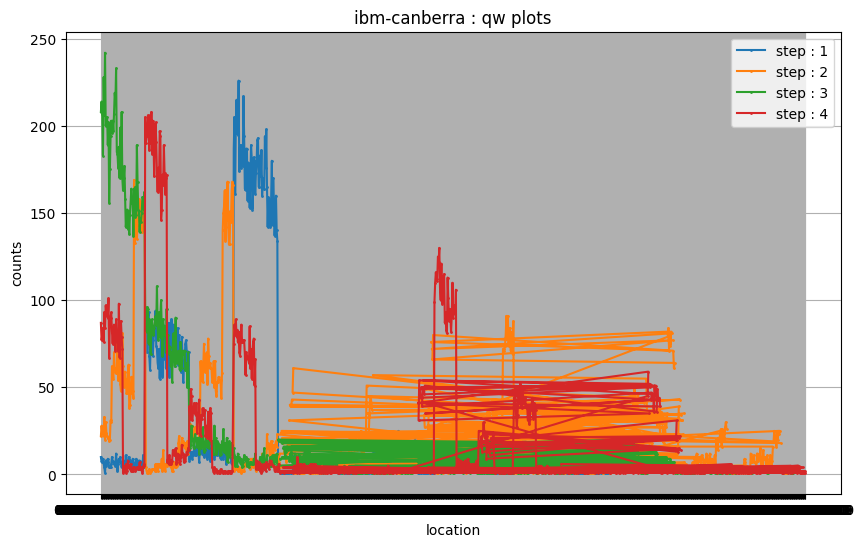

In [9]:
import matplotlib.pyplot as plt

ret_job = provider.retrieve_job('ci9hglpg5luj4cin4jn0')
counts = ret_job.result().get_counts()
dict_list = []
for c in counts:
    counts = get_modified(c)
    counts = dict(sorted(c.items()))
    dict_list.append(counts)
#############################
#plot
plt.figure(figsize=(10,6))
for i in range(0,4):
    plt.plot(list(dict_list[i].keys()), list(dict_list[i].values()), 
             marker='o', markersize=1,
             label='step : '+str(i+1))

plt.xlabel('location')
plt.ylabel('counts')
plt.title('ibm-canberra : qw plots')
plt.legend()
plt.grid()
plt.show()